In [ ]:
# Source - https://github.com/sre-customer-training/lab1-estadistica-descriptiva

__author__ = "Andres M. Correa"
__copyright__ = "BSD 3-Clause License"
__credits__ = []
__license__ = "BSD"
__version__ = "3"
__maintainer__ = "Andres M. Correa"
__email__ = "amcorrea0@gmail.com"
__status__ = "Labs for SRE"

**Bloque 1: Carga y "Diagnóstico del Paciente"**

*Concepto:* Antes de calcular nada, debemos saber qué tan confiables son nuestros datos. En SRE, esto equivale a revisar si los logs están llegando completos.

In [3]:
print("hola mundo")

hola mundo


--- VISTA PREVIA ---


,Nombre,Edad,Cargo,Salario
0,Empleado_0,49.0,Diseñador,50000
1,Empleado_1,29.0,Diseñador,50000
2,Empleado_2,18.0,Desarrollador,50000
3,Empleado_3,NaN,Diseñador,50000
4,Empleado_4,23.0,NaN,1300



--- DETECCIÓN DE HUECOS (Datos Faltantes) ---
Nombre      0
Edad       25
Cargo      10
Salario     0
dtype: int64


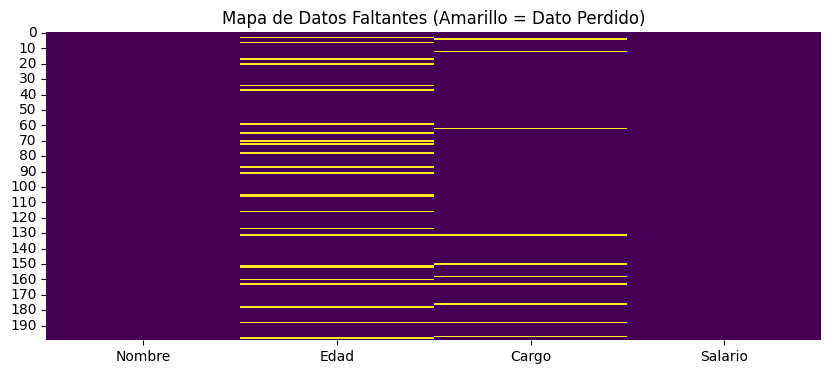

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos desde archivo existente
df = pd.read_csv('../datos/datos_empleados.csv')

# Muestra las primeras 5 filas de datos del DataFrame (head)
print("--- VISTA PREVIA ---")
display(df.head())

print("\n--- DETECCIÓN DE HUECOS (Datos Faltantes) ---")
# Esto nos dice cuántos NaNs (Not a Number) hay por columna
print(df.isnull().sum())

# Visualizar los datos faltantes (Mapa de calor de suciedad)
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Datos Faltantes (Amarillo = Dato Perdido)')
plt.show()

**Bloque 2: Limpieza de Datos (Data Cleaning)**

*Concepto:* Tenemos huecos. ¿Qué hacemos?

* **Opción A (Borrar):** Si no tiene cargo, no me sirve. (Drop)

* **Opción B (Imputar):** Si falta la edad, inventamos una basada en el promedio o mediana del grupo para no perder la fila.

In [6]:
# 1. TRATAMIENTO DE CATEGORÍAS (Cargos)
# Si no sabemos el cargo, lo etiquetamos como "Sin Asignar" en lugar de borrarlo.
df['Cargo'] = df['Cargo'].fillna('Sin Asignar')

# 2. TRATAMIENTO DE NUMÉRICOS (Edad)
# Calculamos la mediana (mejor que el promedio para evitar sesgos por gente muy mayor)
mediana_edad = df['Edad'].median()
print(f"La mediana de edad es: {mediana_edad} años.")

# Rellenamos los huecos con la mediana
df['Edad'] = df['Edad'].fillna(mediana_edad)

print("\n--- VERIFICACIÓN POST-LIMPIEZA ---")
print(df.isnull().sum())
print("¡Datos limpios!")

La mediana de edad es: 33.0 años.

--- VERIFICACIÓN POST-LIMPIEZA ---
Nombre     0
Edad       0
Cargo      0
Salario    0
dtype: int64
¡Datos limpios!


**Bloque 3: Estadística Descriptiva (El efecto del Outlier)**

*Concepto:* Vamos a ver cómo un solo salario gigante rompe el promedio, pero la mediana resiste.

In [7]:
# Estadísticas del Salario
mean_sal = df['Salario'].mean()
median_sal = df['Salario'].median()

print(f"💰 Salario Promedio: ${mean_sal:,.2f}")
print(f"💰 Salario Mediana:  ${median_sal:,.2f}")

diferencia = mean_sal - median_sal
print(f"\n⚠️ DIFERENCIA: ${diferencia:,.2f}")
print("Explicación: El promedio es mucho más alto porque incluimos un salario de $50,000 (Outlier).")
print("Lección SRE: Esto es exactamente lo que pasa con la latencia cuando un servidor se cuelga.")

💰 Salario Promedio: $2,461.03
💰 Salario Mediana:  $1,505.00

⚠️ DIFERENCIA: $956.03
Explicación: El promedio es mucho más alto porque incluimos un salario de $50,000 (Outlier).
Lección SRE: Esto es exactamente lo que pasa con la latencia cuando un servidor se cuelga.


**Bloque 4: Visualización Básica**

*Concepto:* Histogramas para ver distribuciones "Humanas".

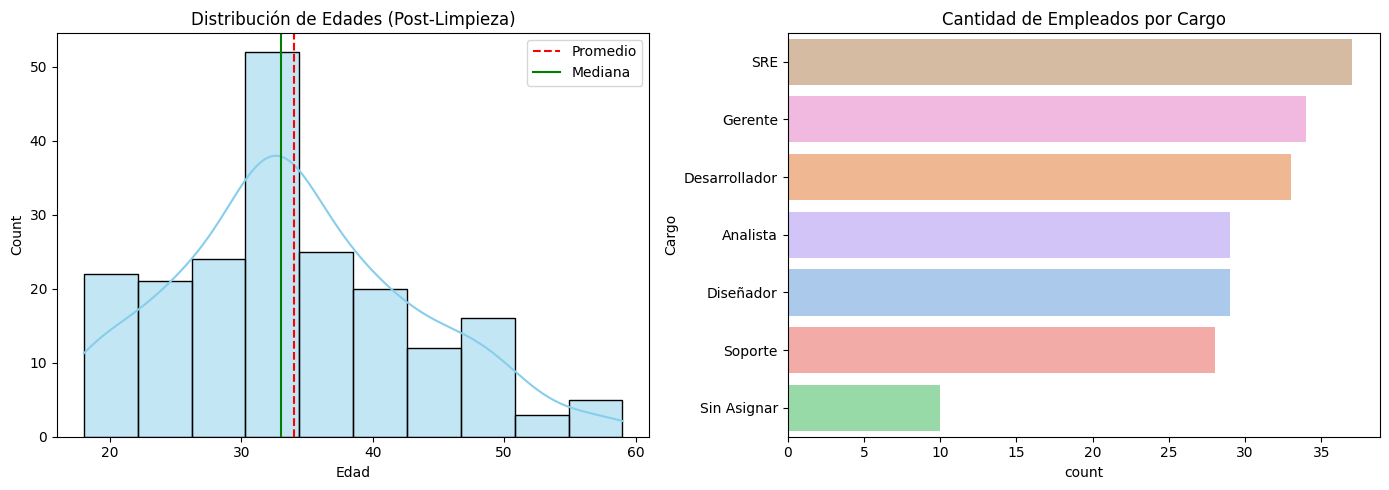

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Distribución de Edades (Histograma)
sns.histplot(df['Edad'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Edades (Post-Limpieza)')
axes[0].axvline(df['Edad'].mean(), color='red', linestyle='--', label='Promedio')
axes[0].axvline(df['Edad'].median(), color='green', linestyle='-', label='Mediana')
axes[0].legend()

# Gráfico 2: Conteo de Cargos (Barplot)
sns.countplot(y='Cargo', data=df, ax=axes[1], palette='pastel', hue='Cargo', legend=False, order=df['Cargo'].value_counts().index)
axes[1].set_title('Cantidad de Empleados por Cargo')

plt.tight_layout()
plt.show()

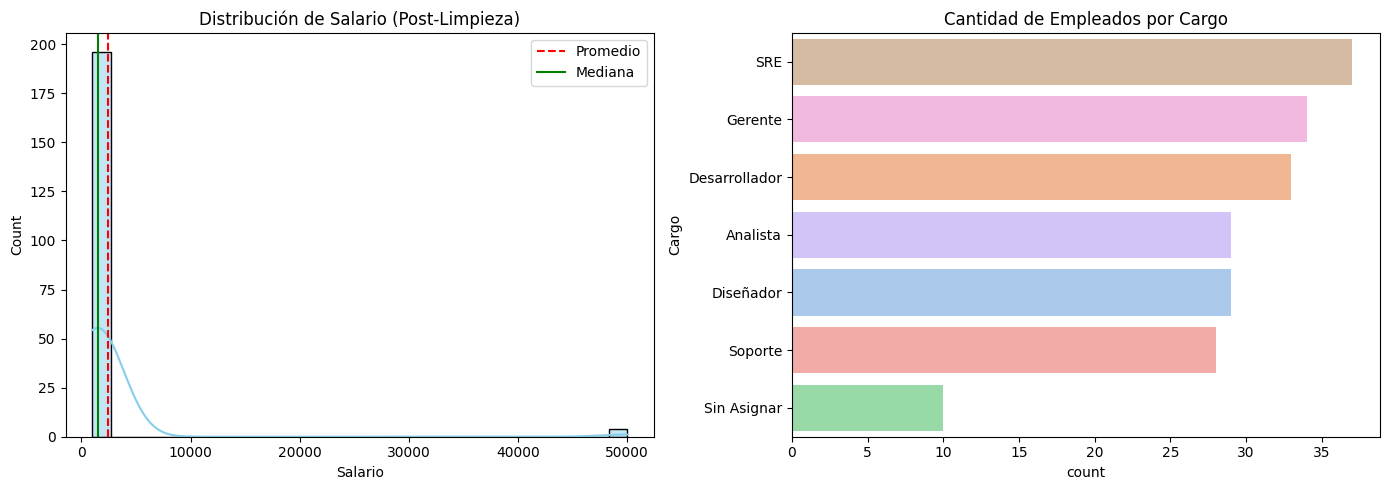

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Distribución de Edades (Histograma)
sns.histplot(df['Salario'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Salario (Post-Limpieza)')
axes[0].axvline(df['Salario'].mean(), color='red', linestyle='--', label='Promedio')
axes[0].axvline(df['Salario'].median(), color='green', linestyle='-', label='Mediana')
axes[0].legend()

# Gráfico 2: Conteo de Cargos (Barplot)
sns.countplot(y='Cargo', data=df, ax=axes[1], palette='pastel', hue='Cargo', legend=False, order=df['Cargo'].value_counts().index)
axes[1].set_title('Cantidad de Empleados por Cargo')

plt.tight_layout()
plt.show()

## Reflexión para el Equipo (Cierre del Nivel 1)

1. **Sobre la Limpieza:** "Rellenamos la edad faltante con la mediana (aprox 35 años). ¿Qué pasaría si en lugar de eso hubiéramos puesto 0? ¿Cómo afectaría eso al promedio de edad de la empresa?"

* *NOTA:* En SRE, si pones 0 a una latencia fallida, parecerá que tu sistema es rapidísimo cuando en realidad está roto.

2. **Sobre el Outlier:** "Vimos que el salario promedio mentía. ¿Entienden ahora por qué no podemos confiar en el 'Tiempo de Respuesta Promedio'?"